In [1]:
import numpy as np
import pandas as pd
from colorama import Fore, Back, Style
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import accuracy_score

        

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>Exploratory Data Analysis</center></strong>
</div>
</center>

There are several techniques to analyse data like classical analysis, exploratory data analysis and bayesian data analysis approach. We proceed with EDA in order to understand the structure of our data, is outliers, models and visualizations.

# Basic Datset Exploration and Structuring

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
# Let's remove the unwanted columns like Comment ID before moving on to EDA
del df['id']

In [6]:
def colorToxicityValuesToRed(value):
    if value==0:
        color='green'
    elif value==1:
        color='red'
    else:
        color='black'
    return 'color: %s' % color
    




In [7]:
# Display the raw dataset in a visually appealing manner

display(df[100:106].style.applymap(colorToxicityValuesToRed,
subset=['toxic','severe_toxic','obscene','threat','insult','identity_hate']))

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
100,"However, the Moonlite edit noted by golden daph was me (on optus ...) Wake up wikkis. So funny",0,0,0,0,0,0
101,Check the following websites: http://www.iranchamber.com/personalities/farabi/farabi.php http://www.islam.org.br/%C2%A0al_farabi.htm http://www.superbeyin.com/sohbet/sohbet.htm,0,0,0,0,0,0
102,i can't believe no one has already put up this page Dilbert's Desktop Games so I did,0,0,0,0,0,0
103,""" Well, after I asked you to provide the diffs within one hour of your next edit here, you made an edit to your talk page here and then did not provide the diffs I requested within one hour of that edit. I then sanctioned you for failing to provide the requested diffs in a timely manner (which, after more than a week, you have still not done). Consequently, your request to lift the sanction is denied. """,0,0,0,0,0,0
104,"What page shoudld there be for important characters that DON'T reoccur? Void, Black Doom, Mephiles, etc",0,0,0,0,0,0
105,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1


In [8]:
# Perform a Descriptive Analysis on the Classification Classes

print(Back.WHITE+f"Percentage of Comments Classified as Toxic               "+Back.GREEN+f"{df['toxic'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Severe Toxic        "+Back.GREEN+f"{df['severe_toxic'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Obscene             "+Back.GREEN+f"{df['obscene'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage  of Comments Classified as Threat              "+Back.GREEN+f"{df['threat'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Insult              "+Back.GREEN+f"{df['insult'].sum()/1595.71}% \n")
print(Back.WHITE+f"Percentage of Comments Classified as Identity Hate       "+Back.GREEN+f"{df['identity_hate'].sum()/1595.71}% \n")

Percentage of Comments Classified as Toxic               9.584448302009763% 

Percentage of Comments Classified as Severe Toxic        0.999555056996572% 

Percentage of Comments Classified as Obscene             5.2948217407925% 

Percentage  of Comments Classified as Threat              0.2995531769557125% 

Percentage of Comments Classified as Insult              4.936360616904074% 

Percentage of Comments Classified as Identity Hate       0.8804858025581089% 



# Text Counts & Lengths Analysis

In [9]:
import nltk
# Character counts
from nltk.tokenize import sent_tokenize
# Word counts
df["char_count"] = df["comment_text"].map(lambda x: len(x))
# Sentence counts
df["word_count"] = df["comment_text"].map(lambda x: len(x.split()))
# String counts
df["sent_count"] = df["comment_text"].map(lambda x: len(sent_tokenize(x)))
# Average word length
df["hashtag_count"] = df["comment_text"].map(lambda x: x.count("#"))
# Average sentence length
df["avg_word_len"] = df["comment_text"].map(lambda x: np.mean([len(w) for w in str(x).split()]))

df["avg_sent_len"] = df["comment_text"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [10]:
df[df['toxic']==1]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,8,1,0,4.625000,8.000000
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,319,53,3,0,5.018868,17.666667
16,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,57,10,3,0,4.600000,3.333333
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648,117,8,0,4.478632,14.625000
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40,8,1,0,4.125000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,1677,319,23,0,4.241379,13.869565
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,33,6,1,0,4.666667,6.000000
159541,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,346,58,5,0,4.948276,11.600000
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,534,103,6,0,4.184466,17.166667


In [11]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

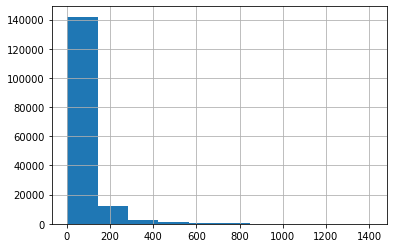

In [12]:
import matplotlib.pyplot as plt
df['word_count'].hist()
plt.show()
# Havent included others as there was no finding associated with the same

# Term Frequency Analysis

In [13]:
import re
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()    
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)   
     # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    # Strip any numericals if present in words
    text =  re.sub(r'\d', '', text).strip()
    # strip any \n present between words
    text = re.sub(r'\n',' ',text).strip()
    #remove stop words 
    
    return text
df["comment_clean"] = df["comment_text"].map(lambda x: clean_text(x))

In [14]:
df["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [15]:
df["comment_clean"][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now'

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>3. N-grams (combination of 1-,2-,3-grams)</center></strong>
</div>
</center>

# Analyising Data on the Basis of N-Grams


In [16]:
# Made a corpus of vocabulary
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
corpus = [word for i in df["comment_clean"].str.split().values.tolist() for word in i if (word not in stop)]

In [17]:
corpus[0:20]

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'reverted',
 'werent',
 'vandalisms',
 'closure',
 'gas',
 'voted',
 'new',
 'york',
 'dolls',
 'fac',
 'please',
 'dont',
 'remove']

In [18]:
# Obtain 20 most frequent words and plot them
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(20)
most_common

[('article', 55460),
 ('page', 45678),
 ('wikipedia', 35679),
 ('talk', 31652),
 ('please', 29619),
 ('would', 29213),
 ('one', 28104),
 ('like', 27710),
 ('dont', 25742),
 ('see', 21497),
 ('also', 20553),
 ('think', 20042),
 ('im', 19277),
 ('know', 18996),
 ('people', 17717),
 ('edit', 17598),
 ('articles', 17525),
 ('use', 16327),
 ('may', 15568),
 ('time', 15435)]

<AxesSubplot:>

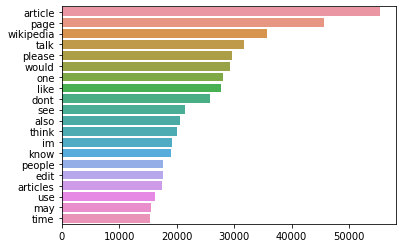

In [19]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [20]:
# Obtain 2-gram words
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

list(ngrams(['I' ,'went','to','the','river','bank'],2))
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [21]:

top_n_bigrams=get_top_ngram(df['comment_clean'],2)[:20]
top_n_bigrams

[('of the', 50233),
 ('in the', 38312),
 ('to the', 26675),
 ('if you', 26409),
 ('on the', 23210),
 ('the article', 22585),
 ('it is', 21778),
 ('to be', 21358),
 ('you are', 17191),
 ('is not', 14782)]

<AxesSubplot:>

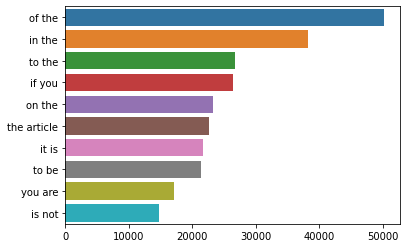

In [22]:
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x) 

In [23]:
# Obtain 3-gram words
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

list(ngrams(['I' ,'went','to','the','river','bank'],3))
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [24]:
top_n_trigrams=get_top_ngram(df['comment_clean'],3)[:20]
top_n_trigrams

[('thank you for', 4018),
 ('if you have', 3552),
 ('my talk page', 3496),
 ('please do not', 3340),
 ('in the article', 3144),
 ('there is no', 3045),
 ('would like to', 2936),
 ('one of the', 2917),
 ('of the article', 2848),
 ('the talk page', 2551)]

<AxesSubplot:>

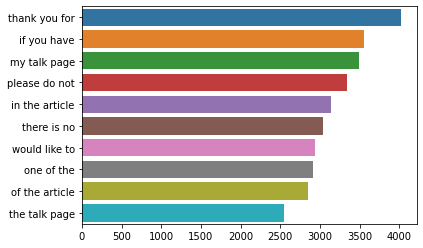

In [25]:
x,y=map(list,zip(*top_n_trigrams)) 
sns.barplot(x=y,y=x) 

<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>4. Training N-Gram Models</center></strong>
</div>
</center>

# Training N-Gram Models Using Binary Relevance & Gaussian NB

Now that we have seen the top 1,2 and 3 gram must recurring vocabulary, we can understand how relevant each gram is. To, further see the impact, let's train models on 1,2,3 gram and compare them using metric results.

WHAT IS BINARY RELEVANCE??
For a multi-label problem in hand, we can choose to solve it by breaking it down into multiple sub-problems of binary classifications corresponding to each singular class in the dataset.
\
\
For example, if we have a dataset with input X, and multiple labels Y1,Y2, Y3,Y4 that it can take up:

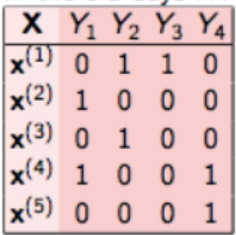
\
\
We may choose to solve the problem by breaking it up like:

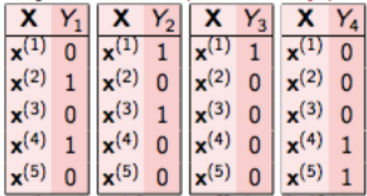

In [26]:
# Let's just train the first 2000 datapoints as of now
df = df[:2000]

In [27]:
x = df['comment_clean']
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

In [29]:
print(len(X_train))

1900


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score, jaccard_score
count_vectorizer = CountVectorizer(ngram_range = (1, 2), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [31]:
len(count_vectorizer.vocabulary_)

20000

In [32]:
print(X_train[0])

  (0, 9946)	1
  (0, 12285)	1
  (0, 15826)	1
  (0, 5548)	1
  (0, 8645)	1
  (0, 9192)	1
  (0, 8394)	1
  (0, 15659)	1
  (0, 9980)	1
  (0, 15830)	1
  (0, 5605)	1
  (0, 8646)	1
  (0, 9226)	1


In [33]:
Doc_Term_Matrix = pd.DataFrame(X_train.toarray(),columns= count_vectorizer.get_feature_names())
Doc_Term_Matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaron,aaron swartz,ab,abc,abide,abide by,abilities,ability,ability to,...,yugoslav,yugoslavia,yup,yya,zadar,zagreb,zealand,zero,zion,zionist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


One Gram

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (1, 1), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions1n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions1n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions1n)}")


Accuracy Score :   0.79
Hamming Loss :   0.075


one and two gram

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (1, 2), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions12n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions12n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions12n)}")

Accuracy Score :   0.85
Hamming Loss :   0.058333333333333334


two gram

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (2, 2), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions2n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions2n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions2n)}")

Accuracy Score :   0.81
Hamming Loss :   0.11666666666666667


one, two and three gram

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (1, 3), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions123n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions123n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions123n)}")

Accuracy Score :   0.85
Hamming Loss :   0.058333333333333334


two and three gram

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (2, 3), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions23n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions23n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions23n)}")

Accuracy Score :   0.81
Hamming Loss :   0.11666666666666667


three gram

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.05)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range = (3, 3), max_features = 20000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions3n = classifier.predict(X_test)
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictions3n)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictions3n)}")

Accuracy Score :   0.63
Hamming Loss :   0.2816666666666667


<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>4. Training Other Multi-Label Models</center></strong>
</div>
</center>

# Neural Network🔥

**Sequential Approach**

HOW DOES IT WORK?
As you may know for multi-class categorization we use the softmax activation function at the output, so the probability of X lying in a particular class can be represented as a probability distribution, with the class with highest probability as our output.

*σ(z)=1+exp(−z)1​*

This obviously wont work with Multi-Label classification so instead we use sigmoid activation function for each class. Here. the probability of each class is modelled as a Bernoulli Distribution.

*P(cj​∣xi​)=1+exp(−zj​)1​*

We use the binary_crossentropy loss and not the usual in multi-class classification used categorical_crossentropy loss.

In [40]:
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(20, input_dim=20000, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-11-17 15:19:22.097887: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                400020    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
Total params: 400,146
Trainable params: 400,146
Non-trainable params: 0
_________________________________________________________________


In [42]:
X_train = pd.DataFrame(X_train.toarray(),columns= count_vectorizer.get_feature_names())
X_train

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abide by the,able to do,able to get,able to post,able to see,able to take,about alternative life,about censorship in,about contributing to,about ed morrissey,...,your way around,your wife and,youre coming from,youre going to,youre right was,yourself but dont,yourself familiar with,yourself then you,yourself to the,yourself with the
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
model.fit(X_train, y_train, epochs=50)

2022-11-17 15:19:22.966700: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
60/60 [==============================] - 1s 4ms/step - loss: 0.6402
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.4563
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2831
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1868
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1393
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1135
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0977
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0866
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 13/50
60/60 [==============================

In [44]:
from sklearn.metrics import hamming_loss, accuracy_score
predictionsSNN = model.predict(X_test)
predictionsSNN = predictionsSNN.round()
acc = accuracy_score(y_test, predictionsSNN)
ham = hamming_loss(y_test,predictionsSNN)
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {acc}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {ham}")

Hamming Loss :   0.89
Hamming Loss :   0.041666666666666664


**Classifier Chains**

HOW DOES IT WORK?

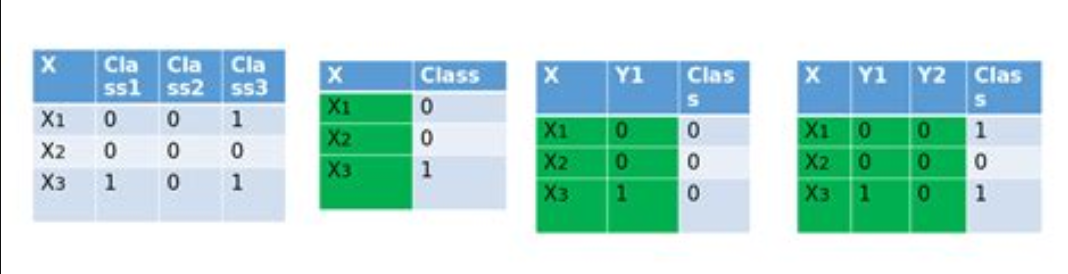

In [45]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

classifier = ClassifierChain(GaussianNB())

classifier.fit(X_train, y_train)
predictionsCCNN = classifier.predict(X_test)


In [46]:
acc = accuracy_score(y_test, predictionsCCNN)
print(acc)

0.63


**Label Powerset**

HOW DOES IT WORK??
we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.
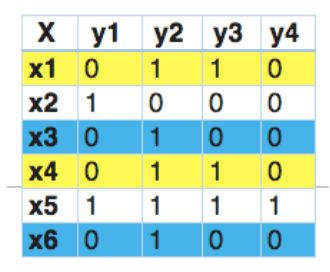 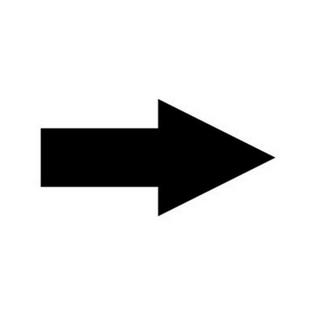 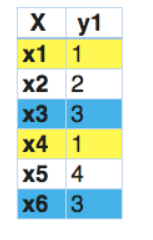

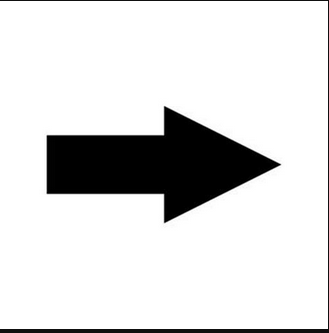

In [47]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictionsLBNN = classifier.predict(X_test)



In [48]:
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictionsLBNN)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictionsLBNN)}")

Accuracy Score :   0.63
Hamming Loss :   0.16


In [49]:
comment = ["I will kill you!"]
comment = count_vectorizer.transform(comment)

In [50]:
pred = classifier.predict(comment)
pred = pd.DataFrame(pred.toarray(),columns= y_test.columns)
print(pred)

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      1             1        1       0       0              0


In [51]:
comment = ["Hey"]
comment = count_vectorizer.transform(comment)
pred = model.predict(comment)
pred = pd.DataFrame(pred,columns= y_test.columns)
print(pred)

     toxic  severe_toxic   obscene    threat    insult  identity_hate
0  0.19782       0.01809  0.099076  0.007324  0.086859       0.016907


In [52]:
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

classifier = MajorityVotingClassifier(
    clusterer = FixedLabelSpaceClusterer(clusters = [[1,2,3], [0, 2, 5], [4, 5]]),
    classifier = ClassifierChain(classifier=GaussianNB())
)
classifier.fit(X_train,y_train)
predictionsVLBNN = classifier.predict(X_test)

In [53]:
print(Back.GREEN+Fore.WHITE +f"Accuracy Score :" + Back.WHITE+Fore.GREEN + f"   {accuracy_score(y_test,predictionsVLBNN)}")
print(Back.GREEN+Fore.WHITE +f"Hamming Loss :" + Back.WHITE+Fore.GREEN + f"   {hamming_loss(y_test,predictionsVLBNN)}")

Accuracy Score :   0.63
Hamming Loss :   0.2816666666666667


<center>
<div style = "background-color: rgba(152, 170, 236, 0.8); border-style: double;">
<strong style = "font-size: 25px; color:rgba(86, 106, 181, 1);"><center>5. Results and Observations</center></strong>
</div>
</center>

In [54]:
from prettytable import PrettyTable
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score, jaccard_score
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "Accuracy Score", "Hamming Loss", "Precision","F1 score", "Recall","Jaccard Similarity"])
 
# Add rows
myTable.add_row(["Binary Relevance Using GNB for 1-Gram", accuracy_score(y_test,predictions1n),
                 hamming_loss(y_test,predictions1n), precision_score(y_test,predictions1n,average='micro'),
                 f1_score(y_test,predictions1n,average='micro'),recall_score(y_test,predictions1n,average='micro'),jaccard_score(y_test,predictions1n,average='micro')])
myTable.add_row(["Binary Relevance Using GNB for 2-Gram", accuracy_score(y_test,predictions2n),
                 hamming_loss(y_test,predictions2n), precision_score(y_test,predictions2n,average='micro'),
                 f1_score(y_test,predictions2n,average='micro'),recall_score(y_test,predictions2n,average='micro'),jaccard_score(y_test,predictions2n,average='micro')])
myTable.add_row(["Binary Relevance Using GNB for 1&2-Gram", accuracy_score(y_test,predictions12n),
                 hamming_loss(y_test,predictions12n), precision_score(y_test,predictions12n,average='micro'),
                 f1_score(y_test,predictions12n,average='micro'),recall_score(y_test,predictions12n,average='micro'),jaccard_score(y_test,predictions12n,average='micro')])
myTable.add_row(["Binary Relevance Using GNB for 3-Gram", accuracy_score(y_test,predictions3n),
                 hamming_loss(y_test,predictions3n), precision_score(y_test,predictions3n,average='micro'),
                 f1_score(y_test,predictions3n,average='micro'),recall_score(y_test,predictions3n,average='micro'),jaccard_score(y_test,predictions3n,average='micro')])
myTable.add_row(["Binary Relevance Using GNB for 2&3-Gram", accuracy_score(y_test,predictions23n),
                 hamming_loss(y_test,predictions23n), precision_score(y_test,predictions23n,average='micro'),
                 f1_score(y_test,predictions23n,average='micro'),recall_score(y_test,predictions23n,average='micro'),jaccard_score(y_test,predictions23n,average='micro')])
myTable.add_row(["Binary Relevance Using GNB for 1,2&3-Gram", accuracy_score(y_test,predictions123n),
                 hamming_loss(y_test,predictions123n), precision_score(y_test,predictions123n,average='micro'),
                 f1_score(y_test,predictions123n,average='micro'),recall_score(y_test,predictions123n,average='micro'),jaccard_score(y_test,predictions123n,average='micro')])


myTable.add_row(["Sequential Neural Networks", accuracy_score(y_test,predictionsSNN),
                 hamming_loss(y_test,predictionsSNN), precision_score(y_test,predictionsSNN,average='micro'),
                 f1_score(y_test,predictionsSNN,average='micro'),recall_score(y_test,predictionsSNN,average='micro'),jaccard_score(y_test,predictionsSNN,average='micro')])
myTable.add_row(["Classifier Chains & Gausian NB", accuracy_score(y_test,predictionsCCNN),
                 hamming_loss(y_test,predictionsCCNN), precision_score(y_test,predictionsCCNN,average='micro'),
                 f1_score(y_test,predictionsCCNN,average='micro'),recall_score(y_test,predictionsCCNN,average='micro'),jaccard_score(y_test,predictionsCCNN,average='micro')])
myTable.add_row(["LabelPower Set & Gausian NB", accuracy_score(y_test,predictionsLBNN),
                 hamming_loss(y_test,predictionsLBNN), precision_score(y_test,predictionsLBNN,average='micro'),
                 f1_score(y_test,predictionsLBNN,average='micro'),recall_score(y_test,predictionsLBNN,average='micro'),jaccard_score(y_test,predictionsLBNN,average='micro')])
myTable.add_row(["Majority Voting Classifier ", accuracy_score(y_test,predictionsVLBNN),
                 hamming_loss(y_test,predictionsVLBNN), precision_score(y_test,predictionsVLBNN,average='micro'),
                 f1_score(y_test,predictionsVLBNN,average='micro'),recall_score(y_test,predictionsVLBNN,average='micro'),jaccard_score(y_test,predictionsVLBNN,average='micro')])

print(myTable)

+-------------------------------------------+----------------+----------------------+---------------------+---------------------+--------+---------------------+
|                 Model Name                | Accuracy Score |     Hamming Loss     |      Precision      |       F1 score      | Recall |  Jaccard Similarity |
+-------------------------------------------+----------------+----------------------+---------------------+---------------------+--------+---------------------+
|   Binary Relevance Using GNB for 1-Gram   |      0.79      |        0.075         | 0.14285714285714285 | 0.15094339622641512 |  0.16  | 0.08163265306122448 |
|   Binary Relevance Using GNB for 2-Gram   |      0.81      | 0.11666666666666667  | 0.09090909090909091 | 0.12500000000000003 |  0.2   | 0.06666666666666667 |
|  Binary Relevance Using GNB for 1&2-Gram  |      0.85      | 0.058333333333333334 |  0.2222222222222222 | 0.18604651162790697 |  0.16  | 0.10256410256410256 |
|   Binary Relevance Using GNB for

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The KNN Approach**

HOW DOES IT WORK?

In [55]:
from skmultilearn.adapt import MLkNN


In [56]:
!pip install arff

  Preparing metadata (setup.py) ... - done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4971 sha256=25e6468d9eece9cb49108da73a962dc1d0fd495d86e17cb3ed20d3cbbabad42d
  Stored in directory: /root/.cache/pip/wheels/fe/81/bd/4ae90e24ba860304e375da219f9205b2586dbee255f3ee70e2
Successfully built arff


In [57]:
!pip install scikit-multilearn
from skmultilearn.dataset import load_dataset
X_trainD, y_trainD, feature_names, label_names = load_dataset('emotions', 'train')
X_testD, y_testD, _, _ =load_dataset('emotions', 'test')

emotions:train - does not exists downloading
Downloaded emotions-train
emotions:test - does not exists downloading
Downloaded emotions-test


In [58]:
X_trainD

<391x72 sparse matrix of type '<class 'numpy.float64'>'
	with 28059 stored elements in List of Lists format>

In [59]:
X_train

,abide by the,able to do,able to get,able to post,able to see,able to take,about alternative life,about censorship in,about contributing to,about ed morrissey,...,your way around,your wife and,youre coming from,youre going to,youre right was,yourself but dont,yourself familiar with,yourself then you,yourself to the,yourself with the
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# from skmultilearn.adapt import MLkNN
# from sklearn.model_selection import GridSearchCV, train_test_split
# import numpy as np

# mlknn_classifier = MLkNN()
# mlknn_classifier.fit(X_train, y_train)

In [61]:
# mlknn_classifier = MLkNN()
# mlknn_classifier.fit(X_train, y_train)

In [62]:
# comment2 = ["I will kill you!"]
# comment2_ = count_vectorizer.transform(comment2)
  
# pred2 = mlknn_classifier.predict(comment2_)
# print(pred2.toarray())

In [63]:
# pred2 = mlknn_classifier.predict(X_test)
  
# print(accuracy_score(y_test, predicted))
# print(hamming_loss(y_test, predicted))